## APIs

Application Programming Interfaces, **APIs**, are a crucial part of software development. They allow developers to create new applications by leveraging existing functionality from other systems. APIs define how software components should interact and facilitate communication between various products and services without requiring direct implementation, they provide a way to access data and functionality from other systems, which can save time and resources.


Pandas is an API.

Pandas is actually set of software components , much of which is not even written in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# You create a dictionary, this is just data.

dict_={'a':[11,21,31],'b':[12,22,32]}


In [ ]:
# When you create a Pandas object with the dataframe constructor, in API lingo this is an "instance".
# The data in the dictionary is passed along to the pandas API.
# You then use the dataframe to communicate with the API.

df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [ ]:
# When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.

df.head()

,a,b
0,11,12
1,21,22
2,31,32


## REST APIs

<p>Rest APIs function by sending a <b>request</b>, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>In this lab, we will use the <a href=https://pypi.org/project/nba-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the  Golden State Warriors lost  by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication. </p>


In [3]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.9/284.9 kB 6.3 MB/s eta 0:00:00


In [4]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [5]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [6]:
# The method get_teams() returns a list of dictionaries.

nba_teams = teams.get_teams()

In [7]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function one dict, to create a dictionary. We use the common keys for each team as the keys, the value is a list; each element of the list corresponds to the values for each team. We then convert the dictionary to a dataframe, each row contains the information for a different team.

In [8]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [9]:
# See the row that contains the warriors by using the column nickname

df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [10]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information
id_warriors

np.int64(1610612744)

## REST APIs and HTTP Requests

When you, the client, use a web page your browser sends an HTTP request to the server where the page is hosted. The server tries to find the desired resource by default "index.html". If your request is successful, the server will send the object to the client in an HTTP response. This includes information like the type of the resource, the length of the resource, and other information.

Uniform resource locator (URL) is the most popular way to find resources on the web.  We can break the URL into three parts.

<ul>
    <li><b>Scheme</b>:- This is this protocol, for this lab it will always be <code>http://</code>  </li>
    <li><b> Internet address or  Base URL </b>:- This will be used to find the location here are some examples: <code>www.wikipedia.org/</code> and  <code> www.github.com </code> </li>
    <li><b>Route</b>:- Location on the web server for example: <code>/images/IDSNlogo.png</code> </li>
</ul>

In [14]:
# Requests is a Python Library that allows you to send HTTP/1.1 requests easily.
import requests

import os
from PIL import Image
from IPython.display import IFrame

In [17]:
url='https://www.wikipedia.org'
r=requests.get(url)

r.status_code

200

In [18]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [19]:
print("request body:", r.request.body)

request body: None


In [20]:
header=r.headers
print(r.headers)

{'date': 'Sat, 12 Apr 2025 09:01:05 GMT', 'cache-control': 's-maxage=86400, must-revalidate, max-age=3600', 'server': 'ATS/9.2.9', 'etag': 'W/"162d4-631a54bf55c80"', 'last-modified': 'Mon, 31 Mar 2025 15:44:34 GMT', 'content-type': 'text/html', 'content-encoding': 'gzip', 'vary': 'Accept-Encoding', 'age': '29770', 'accept-ranges': 'bytes', 'x-cache': 'cp4040 hit, cp4040 hit/217588', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp4040"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 604800, "failure_fraction": 0.05, "success_fraction": 0.0}', 'set-cookie': 'WMF-Last-Access=12-Apr-2025;Path=/;HttpOnly;secure;Expires=Wed, 14 May 2025 12:00:00 GMT, WMF-Last-Acc

In [21]:
header['Content-Type']

'text/html'

In [22]:
 r.encoding

'ISO-8859-1'

In [23]:
r.text[0:100]

'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title'

You can load other types of data for non-text requests, like images.

In [25]:
url='https://www.python.org/static/img/python-logo.png'

r=requests.get(url)

print(r.headers)

{'Connection': 'keep-alive', 'Content-Length': '15770', 'cache-control': 'max-age=604800, public', 'content-type': 'image/png', 'via': '1.1 varnish, 1.1 varnish, 1.1 varnish', 'last-modified': 'Mon, 07 Apr 2025 21:17:12 GMT', 'etag': '"67f440d8-3d9a"', 'Accept-Ranges': 'bytes', 'Date': 'Sat, 12 Apr 2025 17:22:52 GMT', 'Age': '392085', 'X-Served-By': 'cache-iad-kcgs7200128-IAD, cache-iad-kcgs7200128-IAD, cache-bfi-kbfi7400112-BFI', 'X-Cache': 'MISS, HIT, HIT', 'X-Cache-Hits': '0, 2552, 4', 'X-Timer': 'S1744478572.302556,VS0,VE0', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload'}


In [26]:
r.headers['Content-Type']

'image/png'

In [27]:
# An image is a response object that contains the image as a bytes-like object. As a result, we must save it using a file object. First, we specify the file path and name

path=os.path.join(os.getcwd(),'image.png')

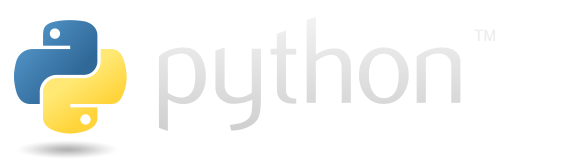

In [29]:
# We save the file, in order to access the body of the response we use the attribute content then save it using the open function and write method.

with open(path,'wb') as f:
    f.write(r.content)

Image.open(path)  # View the image

**Get Request with URL Parameters**

You can use the <b>GET</b> method to modify the results of your query, for example retrieving data from an API. We send a <b>GET</b> request to the  server. Like before we have the <b>Base URL</b>, in the <b>Route</b> we append <code>/get</code>, this indicates we would like to preform a <code>GET</code> request.

The Base URL is for <code>[http://httpbin.org/](http://httpbin.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)</code> is a simple HTTP Request & Response Service. The <code>URL</code> in Python is given by:


In [30]:
url_get='http://httpbin.org/get'

A query string is a part of a uniform resource locator (URL), this sends other information to the web server. The start of the query is a <code>?</code>, followed by a series of parameter and value pairs, as shown in the table below. The first parameter name is <code>name</code> and the value is <code>Joseph</code>. The second parameter name is <code>ID</code> and the Value is <code>123</code>. Each pair, parameter, and value is separated by an equals sign, <code>=</code>.
The series of pairs is separated by the ampersand <code>&</code>.


In [31]:
# To create a Query string, add a dictionary. The keys are the parameter names and the values are the value of the Query string.

payload={"name":"Joseph","ID":"123"}

In [32]:
# Then passing the dictionary payload to the params parameter of the  get() function:

r=requests.get(url_get,params=payload)

In [33]:
# We can print out the URL and see the name and values.

r.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [34]:
# We can view the response as text:

print(r.text)

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, zstd", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-67faa304-482d5e905576f543004ee776"
  }, 
  "origin": "34.82.119.125", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



In [35]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67faa304-482d5e905576f543004ee776'},
 'origin': '34.82.119.125',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

In [36]:
r.json()['args']

{'ID': '123', 'name': 'Joseph'}

## WEB Scraping